In [10]:
#https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/Company.csv

In [11]:
#https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/Startup.csv

In [12]:
import seaborn as sns
import mlem
import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [13]:
path="https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/Company.csv"
df=pd.read_csv(path, delimiter=',')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


eda

In [14]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [15]:
# Senza classi non usare
#df.groupby('class').count()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [17]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [18]:
#na = Nan
#df['TV']=df['TV'].fillna(0)
#df

In [19]:
#df['TV']=df['TV'].fillna(df['TV'].mean()) 
#df

In [20]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

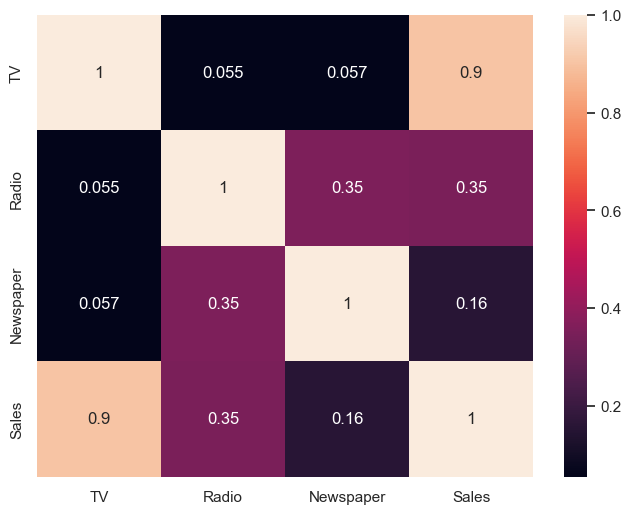

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True)

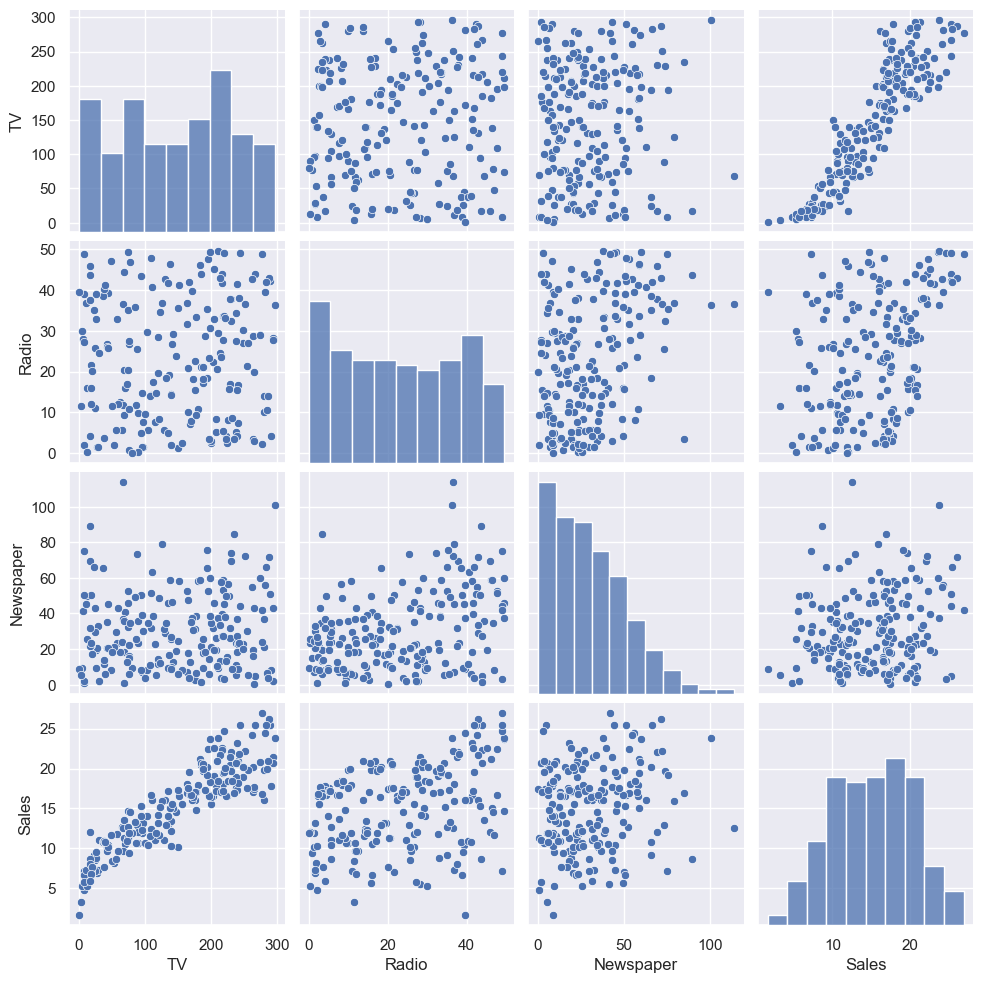

In [22]:
sns.set(color_codes=True)
sns.pairplot(df);

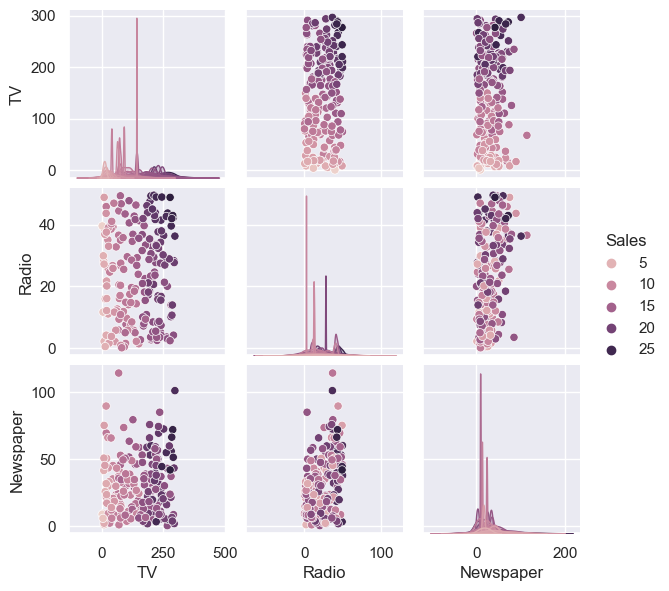

In [23]:
sns.pairplot(df, hue='Sales', height=2, aspect=1);

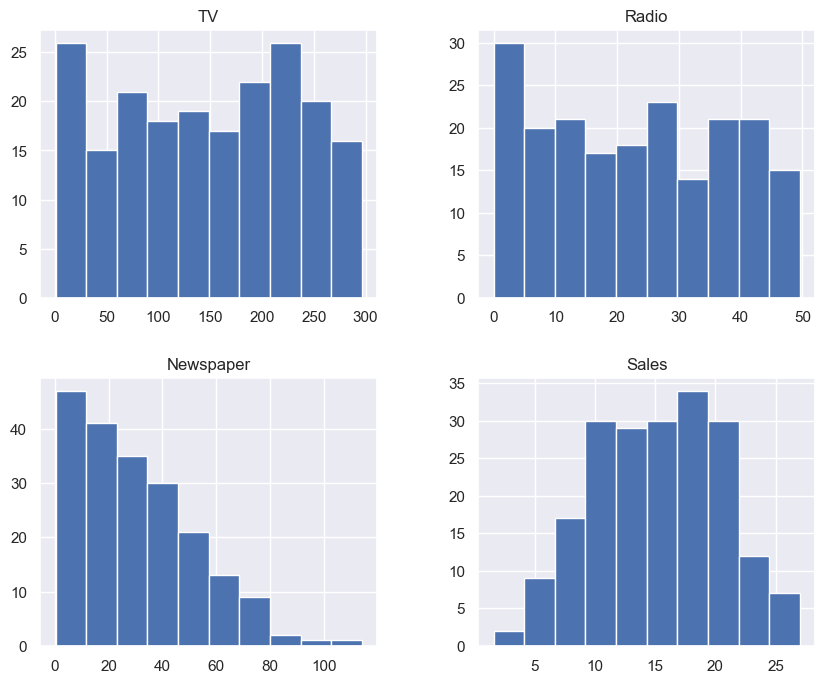

In [24]:
df.hist(figsize=(10,8));


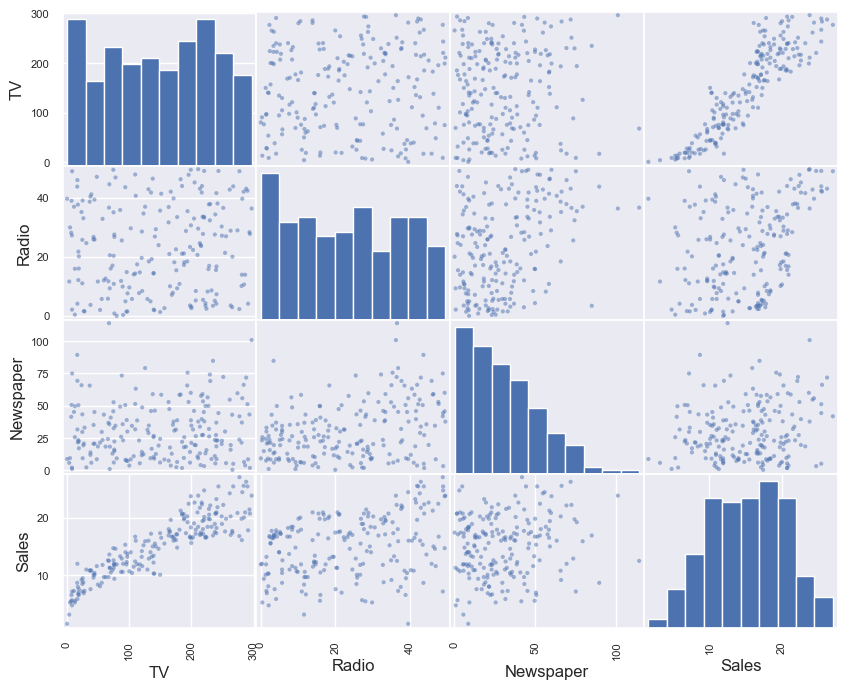

In [25]:
pd.plotting.scatter_matrix(df, figsize=(10,8));

In [26]:
#df.boxplot(figsize=(10,8));

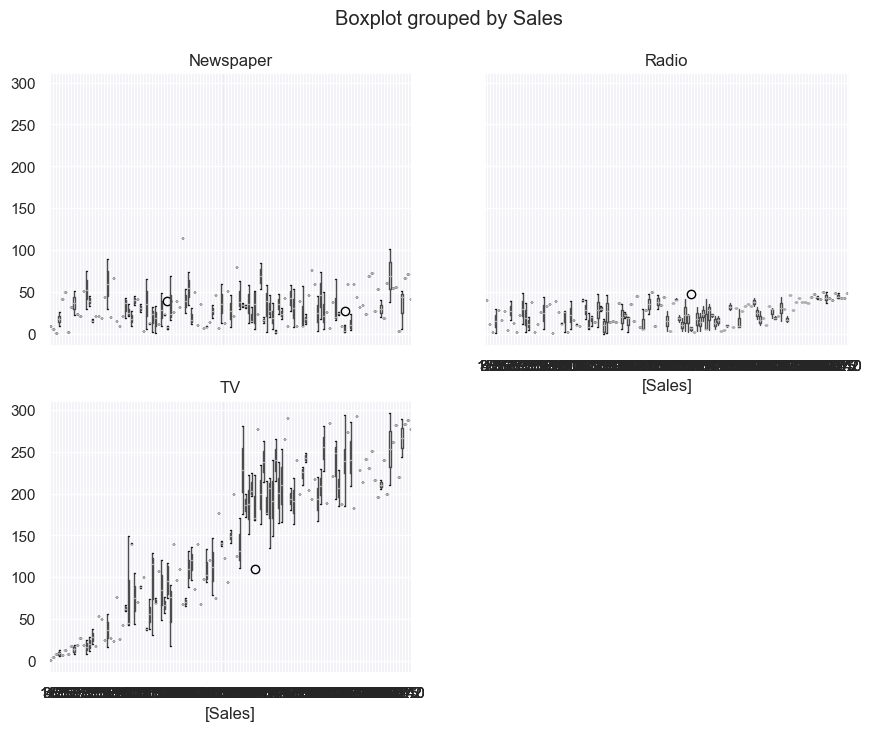

In [27]:
df.boxplot(by='Sales', figsize=(10,8));

In [28]:
# adeguare codice?
#sns.relplot(x='bill_length_mm', y='body_mass_g', hue='species', col='island', row='sex', data=df)


In [29]:
#variare le classi per adeguare il plot

#plt.figure(figsize=(20,10));
# subplot su matrice 2x2

#plt.subplot(2,2,1)
#sns.violinplot(x='class', y='sepal length', data=df)
#plt.subplot(2,2,2)
#sns.violinplot(x='class', y='sepal width', data=df)
#plt.subplot(2,2,3)
#sns.violinplot(x='class', y='petal length', data=df)
#plt.subplot(2,2,4)
#sns.violinplot(x='class', y='petal width', data=df);

Fine eda

In [30]:
y=df['Sales']
X=df.drop(columns='Sales')
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [31]:
X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.3, random_state=667)


In [32]:
model=LinearRegression(fit_intercept=True)
model.fit(X_train,y_train)


LinearRegression()

In [33]:
# Beta regressor
model.coef_

array([0.05822957, 0.09648205, 0.00602888])

In [34]:
# Intercept
model.intercept_

3.989147365768652

In [35]:
y_pred=model.predict(X_test)
y_pred_train=model.predict(X_train)

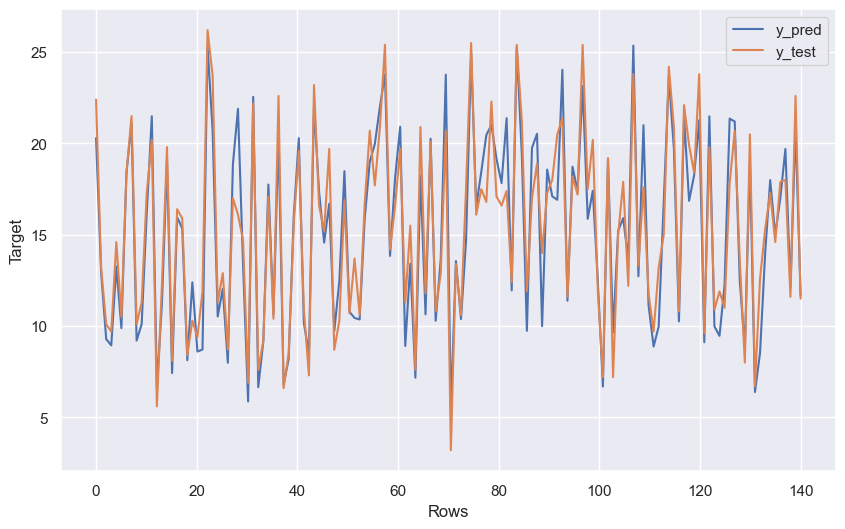

In [36]:
plt.figure(figsize = (10, 6))
x = np.linspace(0,y_pred.shape[0], y_pred.shape[0])

#l = y_test_pred.shape[0]
#x = np.linspace(0,l,l)

plt.plot(x,y_pred)
plt.plot(x, y_test)
plt.title('')
plt.xlabel('Rows')
plt.ylabel('Target')
plt.legend(labels= ['y_pred', 'y_test'])

In [37]:
res_df = pd.DataFrame(data=list(zip(y_pred, y_test)),columns=['predicted', 'real'])
res_df

,predicted,real
0,20.288327,22.4
1,12.949325,13.2
2,9.286526,10.1
3,8.942852,9.7
4,13.266056,14.6
...,...,...
135,17.006457,17.9
136,19.700980,18.0
137,12.138981,11.6
138,20.852071,22.6


In [38]:
res_df['error'] = res_df['real'] - res_df['predicted']
res_df

,predicted,real,error
0,20.288327,22.4,2.111673
1,12.949325,13.2,0.250675
2,9.286526,10.1,0.813474
3,8.942852,9.7,0.757148
4,13.266056,14.6,1.333944
...,...,...,...
135,17.006457,17.9,0.893543
136,19.700980,18.0,-1.700980
137,12.138981,11.6,-0.538981
138,20.852071,22.6,1.747929


In [39]:
res_df['error'].mean()

0.2148091559095634

In [40]:
import plotly.express as px

fig = px.scatter_3d(df, x='TV', y='Radio', z='Newspaper', color='Sales', color_continuous_scale='Reds', title='Regresione multipla')
fig.update_layout(
    scene=dict(
        xaxis_title='TV',
        yaxis_title='Radio',
        zaxis_title='Newspaper'
    )
)

fig.show()


In [41]:

r2score=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=mean_squared_error(y_test,y_pred, squared=False)

In [42]:
print('R2 score:',r2score)
print('MAE:' ,mae)
print('MSE:',mse)
print('RMSE:',rmse)

R2 score: 0.888905641799073
MAE: 1.3287896852396783
MSE: 2.903424751692345
RMSE: 1.7039438816147512


In [43]:
import joblib

## to save a model
joblib.dump(model,'reg_test.pkl')

['reg_test.pkl']

In [44]:
## to load model
newmodel = joblib.load('reg_test.pkl')
newmodel

LinearRegression()

In [45]:
mlem.api.save(model, 'model.mlem', sample_data=X_train)

MlemModel(location=Location(path='c:/Users/Manu/Documents/github repo/primarepo/repo_verifica/model.mlem', project=None, rev=None, uri='file://c:/Users/Manu/Documents/github repo/primarepo/repo_verifica/model.mlem', project_uri=None, fs=<fsspec.implementations.local.LocalFileSystem object at 0x0000020F5BD54650>), params={}, artifacts={'data': LocalArtifact(uri='model', size=563, hash='f1aa7a0099a36bd1959a3fc232e20830')}, requirements=Requirements(__root__=[InstallableRequirement(module='sklearn', version='1.2.2', package_name='scikit-learn', extra_index=None, source_url=None, vcs=None, vcs_commit=None), InstallableRequirement(module='pandas', version='1.5.0', package_name=None, extra_index=None, source_url=None, vcs=None, vcs_commit=None), InstallableRequirement(module='numpy', version='1.24.2', package_name=None, extra_index=None, source_url=None, vcs=None, vcs_commit=None)]), processors_cache={'model': SklearnModel(model=LinearRegression(), io=SimplePickleIO(), methods={'predict': Si